<a href="https://colab.research.google.com/github/DanieleFoscarin/NNDL_hw3/blob/main/state_from_image_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(400, 600, 3)


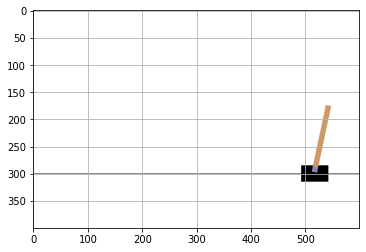

In [30]:
frame = np.load("/content/drive/MyDrive/UNI_ICT/NNDL/NNDL_hw3_data/fame.npy")
plt.imshow(frame)
plt.grid()
print(np.shape(frame))

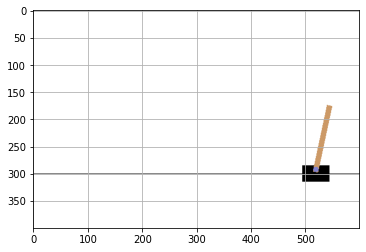

In [31]:
frame_2 = frame.copy()
frame_2[:,2:,:] = frame[:,:-2,:]
frame_2[:,0:2,:] = frame[:,-3:-1,:]

plt.imshow(frame_2)
plt.grid()

(140, 120)
[14, 81]
(16800, 1)


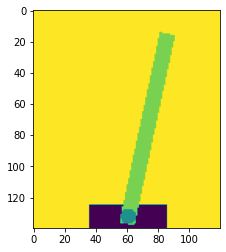

In [44]:
# we consider frame1 the old and frame2 the current
# frame1 = frame.copy

frame1 = frame[160:300]
frame2 = frame_2[160:300]
cart_pos1 = np.mean(np.arange(600)[frame1[139,:,0]<255])
cart_pos2 = np.mean(np.arange(600)[frame2[139,:,0]<255])

cart_vel = cart_pos2 - cart_pos1

# resctrict the searched area in the neighborhood of the cart
flat_search1 = frame1[:,int(np.clip(cart_pos1-60, 0 ,np.shape(frame1)[1])):int(np.clip(cart_pos1+60, 0 ,np.shape(frame1)[1])),0]
flat_search2 = frame2[:,int(np.clip(cart_pos1-60, 0 ,np.shape(frame2)[1])):int(np.clip(cart_pos1+60, 0 ,np.shape(frame2)[1])),0]
plt.imshow(flat_search1)
print(np.shape(flat_search1))

#reshape varying the last dimension first
flat_search1 = np.reshape(flat_search1, (120*140,1))
flat_search2 = np.reshape(flat_search2, (120*140,1))

idx1 = np.argmax(flat_search1<255)
point1 = [idx1//120, idx1%120] 
point1 = (point1[0], point1[1]-60)
pole_pos1 = (point1[0], cart_pos1 + point1[1])

idx2 = np.argmax(flat_search1<255)
point2 = [idx2//120, idx2%120]
point2 = (point2[0], point2[1]-60)
pole_pos2 = (point2[0], cart_pos2 + point2[1])

print(pole_pos1, pole_pos2)
print(np.shape(flat_search1))

# pole_pos = 

need 


*   cart position
*   cart velocity
*   pole angle
*   pole angular velocity 


In [21]:
def state_from_image(frame1, frame2):
    # we consider frame1 the old and frame2 the current
    frame1 = frame1[160:300]
    frame2 = frame2[160:300]
    cart_pos1 = np.mean(np.arange(600)[frame1[139,:,0]<255])
    cart_pos2 = np.mean(np.arange(600)[frame2[139,:,0]<255])

    cart_vel = cart_pos2 - cart_pos1

    

    return cart_pos2, cart_vel


state = state_from_image(frame, frame2)
print(state)

IndexError: ignored